In [1]:
import numpy as np
import pandas as pd
import edhec_risk_kit as erk

%load_ext autoreload
%autoreload 2

In [4]:
erk.bond_price(5, 100, .05, 12,.03)

0    109.275393
dtype: float64

In [57]:
rates, zc_prices = erk.cir(10, 500, b=0.03, r_0=0.03)
rates

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,...,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000
1,0.030346,0.024162,0.032223,0.028043,0.029357,0.030373,0.029696,0.031896,0.028645,0.032261,...,0.029524,0.033104,0.026583,0.033415,0.029031,0.028748,0.033976,0.031842,0.025237,0.032096
2,0.030971,0.023589,0.033937,0.031944,0.027506,0.031692,0.022811,0.028887,0.031176,0.036391,...,0.026004,0.031355,0.026171,0.036910,0.027173,0.025234,0.031765,0.033847,0.028365,0.034334
3,0.029369,0.022482,0.039838,0.030324,0.029217,0.033115,0.019180,0.026611,0.030706,0.035246,...,0.021920,0.029094,0.025223,0.041111,0.026052,0.024168,0.032683,0.036937,0.031840,0.032183
4,0.032962,0.020927,0.036747,0.034658,0.030656,0.030366,0.021430,0.020533,0.031730,0.037161,...,0.022453,0.027178,0.024761,0.039662,0.025073,0.029911,0.026106,0.031679,0.037981,0.034320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.029841,0.032769,0.040820,0.095441,0.049034,0.024582,0.012790,0.050227,0.033741,0.039871,...,0.030501,0.049142,0.007223,0.015221,0.053072,0.048034,0.003176,0.029953,0.036896,0.009648
117,0.026339,0.030260,0.040497,0.094721,0.048993,0.026103,0.011809,0.050624,0.034760,0.042335,...,0.030985,0.054362,0.005059,0.014103,0.054668,0.045018,0.003289,0.033668,0.041448,0.008429
118,0.026367,0.028189,0.036026,0.087157,0.041961,0.029841,0.011509,0.052245,0.034265,0.048177,...,0.028291,0.053917,0.005555,0.015700,0.052662,0.049326,0.003134,0.033002,0.042680,0.008836
119,0.031290,0.024047,0.041726,0.084986,0.041581,0.023588,0.011720,0.055472,0.028967,0.050168,...,0.026561,0.051867,0.005339,0.014543,0.057537,0.049776,0.004878,0.033605,0.043721,0.009480


In [9]:
erk.bond_price(5, 100, 0.05, 12, rates.iloc[0][[1,2,3]])
# At time 0, since all interest rates are r_0, bond prices should be the same as before

1    109.275393
2    109.275393
3    109.275393
dtype: float64

In [11]:
erk.bond_price(5, 100, 0.05, 12, rates.iloc[1][[1,2,3]])
# Bond prices change among different simulations due to CIR Model which simulate different rates

1    108.871678
2    108.574979
3    108.976441
dtype: float64

In [13]:
rates[[1,2,3]].head()

,1,2,3
0,0.030000,0.030000,0.030000
1,0.030831,0.031444,0.030615
2,0.030920,0.033996,0.024906
3,0.029599,0.030983,0.025906
4,0.030579,0.030386,0.025676


### Start simulating changes in bond prices

In [16]:
# After changing the bond_price function, we can now simulate bond prices for each rate at each period
erk.bond_price(5, 100, 0.05, 12, rates[[1,2,3,4,5]])

,1,2,3,4,5
0,109.275,109.275,109.275,109.275,109.275
1,108.735,108.443,108.838,107.702,110.173
2,108.556,107.124,111.416,105.456,109.136
3,109.03,108.39,110.757,103.528,110.52
4,108.436,108.524,110.687,105.411,109.419
...,...,...,...,...,...
116,100.417,100.417,100.417,100.417,100.417
117,100.417,100.417,100.417,100.417,100.417
118,100.417,100.417,100.417,100.417,100.417
119,100.417,100.417,100.417,100.417,100.417


<AxesSubplot:>

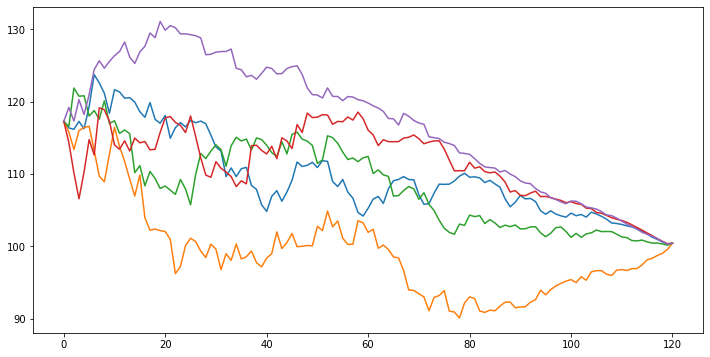

In [18]:
erk.bond_price(10, 100, 0.05, 12, rates[[1,2,3,4,5]]).plot(legend=False, figsize=(12,6))

<AxesSubplot:>

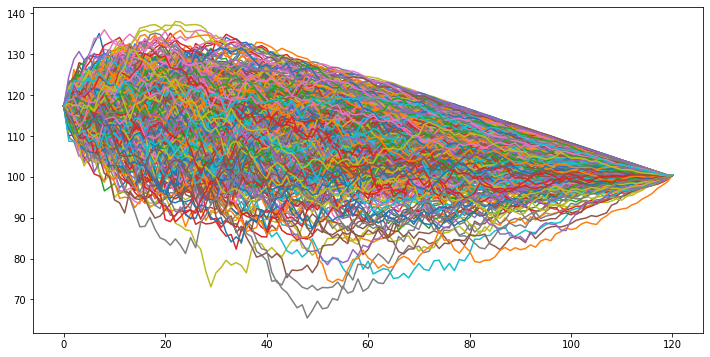

In [20]:
erk.bond_price(10, 100, 0.05, 12, rates).plot(legend=False, figsize=(12,6))

In [21]:
rates.shape

(121, 500)

In [22]:
prices = erk.bond_price(10, 100, 0.05, 12, rates[[1,2,3,4,5]])
prices

,1,2,3,4,5
0,117.26,117.26,117.26,117.26,117.26
1,116.36,115.791,116.561,114.353,119.185
2,116.16,113.361,121.866,110.149,117.306
3,117.259,115.985,120.74,106.558,120.257
4,116.236,116.412,120.803,110.252,118.217
...,...,...,...,...,...
116,101.249,98.32,100.432,101.456,101.368
117,100.954,98.7164,100.444,101.061,101.027
118,100.599,99.0094,100.317,100.684,100.675
119,100.304,99.5513,100.153,100.347,100.304


In [23]:
# We have the prices, so let's go for RETURNS ! and then we can apply all methods we learned
br = prices.pct_change().dropna()
erk.annualize_rets(br,12)
# Problem, coupons are not included ! Only prices

1   -0.015387
2   -0.015387
3   -0.015387
4   -0.015387
5   -0.015387
dtype: float64

In [29]:
p = erk.bond_price(10, 100, .05, 12, rates[[1,2,3,4]])
btr = erk.bond_total_return(p, 100, 0.05, 12)
erk.annualize_rets(btr, 12)

1    0.030585
2    0.035597
3    0.031139
4    0.029827
dtype: float64

In [58]:
prices_10 = erk.bond_price(10, 100, .05, 12, rates)
prices_10
# The end is always the same ! Value of the bond at the end converges to the value of the final payment

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,117.26,117.26,117.26,117.26,117.26,117.26,117.26,117.26,117.26,117.26,...,117.26,117.26,117.26,117.26,117.26,117.26,117.26,117.26,117.26,117.26
1,116.812,122.764,115.073,118.99,117.742,116.787,117.422,115.373,118.416,115.037,...,117.584,114.266,120.394,113.983,118.05,118.318,113.474,115.424,121.705,115.189
2,116.113,123.158,113.414,115.219,119.361,115.45,123.929,118.055,115.925,111.236,...,120.801,115.76,120.64,110.781,119.678,121.547,115.384,113.495,118.546,113.058
3,117.473,124.073,108.2,116.59,117.614,114.053,127.387,120.066,116.239,112.159,...,124.63,117.729,121.397,107.131,120.6,122.419,114.441,110.682,115.204,114.894
4,114.088,125.423,110.769,112.587,116.165,116.43,124.925,125.816,115.192,110.413,...,123.917,119.382,121.677,108.289,121.378,116.846,120.394,115.239,109.711,112.884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,100.668,100.57,100.303,98.515,100.032,100.843,101.237,99.9925,100.538,100.335,...,100.646,100.028,101.424,101.156,99.8987,100.065,101.56,100.664,100.433,101.342
117,100.589,100.491,100.236,98.8994,100.025,100.595,100.953,99.9845,100.379,100.19,...,100.473,99.8919,101.123,100.895,99.8844,100.124,101.167,100.406,100.212,101.038
118,100.393,100.362,100.232,99.3874,100.133,100.335,100.641,99.9628,100.261,100.03,...,100.361,99.9352,100.74,100.571,99.9559,100.011,100.781,100.282,100.121,100.685
119,100.156,100.216,100.069,99.7105,100.07,100.22,100.319,99.9546,100.175,99.9986,...,100.195,99.9845,100.372,100.295,99.9375,100.002,100.376,100.136,100.052,100.337


In [59]:
prices_30 = erk.bond_price(30, 100, .05, 12, rates)
prices_30
# Do not converge because there is still 20 years to go since rates are simulated for only 10 years (121 rows)
# Long bond as a hedge is not safe ! Prices may vary along the way.

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,139.532,139.532,139.532,139.532,139.532,139.532,139.532,139.532,139.532,139.532,...,139.532,139.532,139.532,139.532,139.532,139.532,139.532,139.532,139.532,139.532
1,138.609,154.996,134.103,144.428,141.07,138.544,140.22,134.872,142.876,134.012,...,140.649,132.055,148.287,131.344,141.892,142.611,130.071,135.002,151.968,134.4
2,137.023,156.532,130.11,134.701,145.749,135.298,158.8,142.185,136.531,124.748,...,149.764,136.101,149.309,123.653,146.625,151.879,135.125,130.314,143.517,129.222
3,140.896,159.655,117.696,138.532,141.276,131.924,169.83,148.034,137.6,127.167,...,161.33,141.586,151.812,115.245,149.541,154.769,132.918,123.561,134.888,134.084
4,132.223,164.212,123.922,128.412,137.658,138.364,162.681,165.427,135.088,123.058,...,159.623,146.443,152.995,118.013,152.128,139.479,149.302,135.21,121.37,129.158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,130.702,125.552,112.669,59.279,101.242,140.643,166.59,99.7115,123.899,114.096,...,129.518,101.102,180.872,160.787,96.1834,102.549,192.189,130.5,118.723,174.474
117,137.104,129.86,113.117,59.7739,101.292,137.555,168.756,99.2101,122.133,110.412,...,128.574,94.652,186.482,163.201,94.2909,106.612,191.496,123.954,111.707,177.365
118,136.935,133.521,120.011,64.7666,110.926,130.519,169.245,97.2049,122.889,102.349,...,133.333,95.1907,184.774,159.257,96.6973,100.86,191.577,125.008,109.887,176.012
119,127.872,141.307,111.239,66.348,111.451,142.218,168.473,93.3811,131.999,99.788,...,136.452,97.6729,185.034,161.721,91.0363,100.284,186.307,123.92,108.383,174.073


In [62]:
rets_30 = erk.bond_total_return(prices_30, 100, .05, 12)
rets_10 = erk.bond_total_return(prices_10, 100, .05, 12)
rets_bonds = .6*rets_10 + 4*rets_30

In [63]:
mean_rets_bonds = rets_bonds.mean(axis='columns')
erk.summary_stats(pd.DataFrame(mean_rets_bonds))

,Annualized Return,Annualized Volatility,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.194203,0.029361,-0.179277,2.976598,-0.000623,0.003848,5.443872,-0.006673


In [51]:
price_eq = erk.gbm(n_years=10, n_scenarios=500, mu=0.07, sigma=0.15)
price_eq

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,101.756049,104.479741,99.283188,98.019557,100.485874,109.025713,101.618600,103.270072,101.816614,98.333260,...,105.316999,95.579475,97.874952,106.712018,103.946699,100.141300,102.033731,100.881189,92.675574,97.732186
2,96.427020,97.834051,99.456228,93.600187,103.952764,102.768007,89.833703,111.793681,104.967828,104.958425,...,106.502602,97.693557,101.618005,106.507940,107.114894,94.300844,105.222917,102.703818,97.283312,98.192690
3,97.865033,95.989856,89.841895,96.245063,104.030623,100.634398,94.996874,119.437147,107.251805,110.336626,...,104.821759,97.099714,93.347671,105.986976,105.749937,96.731745,98.299594,105.780657,100.692222,95.109509
4,93.448657,99.781263,88.283619,94.598494,103.215988,102.158364,93.410588,126.450762,115.118845,116.869846,...,98.573086,104.737789,101.504765,103.496576,108.515434,99.114291,97.251150,101.429790,98.660844,93.480235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,246.812857,637.590682,57.425053,103.216561,250.862268,169.367119,70.054466,308.749767,164.443737,191.550287,...,256.825437,223.168138,62.237715,89.264267,260.917940,316.225734,78.634694,99.840216,285.086745,99.184070
117,269.669500,641.836518,56.650488,102.372671,260.089332,175.208275,73.673129,326.447739,156.759547,207.238412,...,258.794255,225.145314,62.325912,88.974571,279.146752,336.469055,81.469988,93.630217,281.753440,96.621168
118,259.567025,636.097725,60.193910,106.922318,265.121454,176.505283,74.175564,308.577405,157.166414,220.275971,...,254.254905,218.544047,65.594667,88.579952,290.582732,336.085802,76.284441,96.040184,263.026626,103.495322
119,278.642173,629.107026,68.035364,113.926349,250.335333,175.510830,75.583321,335.492897,160.347860,226.085906,...,240.242506,216.614481,60.698368,92.282312,282.232502,368.103066,78.034180,93.919775,254.920374,105.239376


In [52]:
rets_eq = price_eq.pct_change().dropna()
rets_eq

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
1,0.017560,0.044797,-0.007168,-0.019804,0.004859,0.090257,0.016186,0.032701,0.018166,-0.016667,...,0.053170,-0.044205,-0.021250,0.067120,0.039467,0.001413,0.020337,0.008812,-0.073244,-0.022678
2,-0.052371,-0.063607,0.001743,-0.045087,0.034501,-0.057397,-0.115972,0.082537,0.030950,0.067375,...,0.011257,0.022119,0.038243,-0.001912,0.030479,-0.058322,0.031256,0.018067,0.049719,0.004712
3,0.014913,-0.018850,-0.096669,0.028257,0.000749,-0.020761,0.057475,0.068371,0.021759,0.051241,...,-0.015782,-0.006079,-0.081387,-0.004891,-0.012743,0.025778,-0.065797,0.029958,0.035041,-0.031399
4,-0.045127,0.039498,-0.017345,-0.017108,-0.007831,0.015144,-0.016698,0.058722,0.073351,0.059212,...,-0.059612,0.078662,0.087384,-0.023497,0.026151,0.024630,-0.010666,-0.041131,-0.020174,-0.017131
5,0.072515,-0.007933,-0.015395,-0.003953,-0.045142,0.006586,0.036932,0.024168,-0.003608,-0.020002,...,0.059481,-0.041204,-0.056355,-0.027369,-0.052741,0.008077,-0.001653,-0.018638,-0.002523,0.039076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.025802,-0.015862,-0.035092,0.071381,0.035206,0.048311,0.005182,-0.008867,0.045142,0.052219,...,-0.052046,0.025522,0.017986,-0.019796,0.064365,0.046065,0.006255,-0.035015,0.043835,0.019737
117,0.092607,0.006659,-0.013488,-0.008176,0.036781,0.034488,0.051655,0.057321,-0.046728,0.081901,...,0.007666,0.008860,0.001417,-0.003245,0.069864,0.064015,0.036057,-0.062199,-0.011692,-0.025840
118,-0.037462,-0.008941,0.062549,0.044442,0.019348,0.007403,0.006820,-0.054742,0.002595,0.062911,...,-0.017540,-0.029320,0.052446,-0.004435,0.040968,-0.001139,-0.063650,0.025739,-0.066465,0.071145
119,0.073488,-0.010990,0.130270,0.065506,-0.055771,-0.005634,0.018979,0.087224,0.020243,0.026376,...,-0.055112,-0.008829,-0.074645,0.041797,-0.028736,0.095265,0.022937,-0.022078,-0.030819,0.016852


In [55]:
# Create a stock bond portfolio
rets = .7*rets_eq + .3*rets_bonds
rets_mean = rets.mean(axis='columns')
erk.summary_stats(pd.DataFrame(rets_mean))

,Annualized Return,Annualized Volatility,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.00666,0.007787,-0.07122,2.313456,0.003202,0.003947,-2.917216,-0.01195
